In [1]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
from sympy import Symbol
from scipy import interpolate
from sympy.solvers import solve
%matplotlib inline

In [2]:
home = os.path.expanduser("~")

direc = os.listdir(".")

In [3]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [4]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])/38316
red_chi_2_2 = np.abs(2*df['chi_2_2'])/38316
red_chi_subt = red_chi_2_1 - red_chi_2_2

In [8]:
df[['name','tE_true']][df['rho']>0.2]

,name,tE_true
1625,cassan_19_9_2484.det.lc.gz,252.25100
4121,cassan_11_140_3006.det.lc.gz,735.87200
4670,cassan_16_76_1743.det.lc.gz,917.63900
5014,cassan_1_102_1951.det.lc.gz,268.57400
5172,cassan_20_63_935.det.lc.gz,655.99600
5232,cassan_21_34_1569.det.lc.gz,0.18580
5608,cassan_24_76_1581.det.lc.gz,705.83000
5800,cassan_26_76_865.det.lc.gz,1101.13000
6320,cassan_31_102_2306.det.lc.gz,661.08300
8022,cassan_41_61_3251.det.lc.gz,8.79803


In [53]:
df['chi_2_2'][df['name']=='cassan_0_136_2536.det.lc.gz']-df['chi_2_1'][df['name']=='cassan_0_136_2536.det.lc.gz']

22    45.964481
dtype: float64

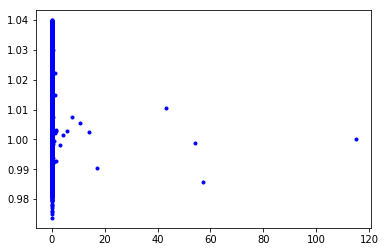

In [8]:
plt.plot(df['s_fitted'][red_chi_2_2<1.04]/38316,red_chi_2_2[red_chi_2_2<1.04],'b.')

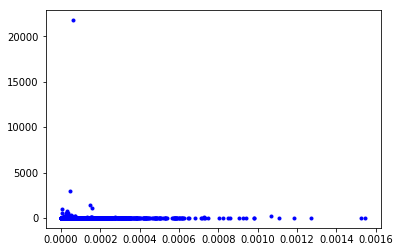

In [7]:
plt.plot(df['s_true']/38316,red_chi_2_2,'b.')

(array([  0.,   0.,   1.,   1.,   2.,   4.,   3.,  10.,  22.,  27.,  45.,
         76., 108., 141., 203., 282., 357., 475., 551., 604., 691., 724.,
        770., 707., 680., 670., 593., 547., 477., 392., 321., 242., 226.,
        157., 156., 124., 107.,  99.,  61.,  63.,  51.,  48.,  43.,  39.,
         45.,  40.,  37.,  34.,  33.]),
 array([0.97      , 0.97138036, 0.97276268, 0.97414697, 0.97553323,
        0.97692147, 0.97831168, 0.97970386, 0.98109803, 0.98249418,
        0.98389232, 0.98529245, 0.98669457, 0.98809869, 0.9895048 ,
        0.99091292, 0.99232304, 0.99373517, 0.9951493 , 0.99656545,
        0.99798361, 0.99940379, 1.000826  , 1.00225022, 1.00367647,
        1.00510476, 1.00653507, 1.00796742, 1.00940181, 1.01083824,
        1.01227672, 1.01371724, 1.01515981, 1.01660443, 1.01805111,
        1.01949985, 1.02095065, 1.02240352, 1.02385845, 1.02531545,
        1.02677453, 1.02823568, 1.02969891, 1.03116422, 1.03263162,
        1.03410111, 1.03557269, 1.03704636, 1.038522

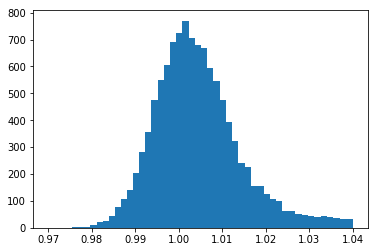

In [8]:
plt.hist(red_chi_2_2[red_chi_2_2<1.04],bins=np.logspace(np.log10(0.97),np.log10(1.04),50))

In [9]:
len(red_chi_2_2[red_chi_2_2<1.04])

11089

(array([8.000e+00, 2.300e+02, 1.943e+03, 4.319e+03, 3.071e+03, 9.850e+02,
        3.380e+02, 2.220e+02, 1.530e+02, 1.320e+02, 1.000e+02, 8.700e+01,
        7.600e+01, 5.200e+01, 5.000e+01, 3.900e+01, 3.800e+01, 3.300e+01,
        3.400e+01, 3.000e+01, 2.900e+01, 2.300e+01, 2.600e+01, 2.200e+01,
        1.200e+01, 2.400e+01, 2.800e+01, 2.300e+01, 2.000e+01, 2.000e+01,
        1.500e+01, 1.700e+01, 1.100e+01, 1.100e+01, 1.300e+01, 1.200e+01,
        1.600e+01, 1.100e+01, 1.100e+01, 1.300e+01, 1.200e+01, 6.000e+00,
        1.400e+01, 1.300e+01, 8.000e+00, 5.000e+00, 1.300e+01, 4.000e+00,
        8.000e+00]),
 array([0.97      , 0.97866802, 0.9874135 , 0.99623713, 1.00513961,
        1.01412165, 1.02318394, 1.03232722, 1.04155221, 1.05085963,
        1.06025022, 1.06972473, 1.0792839 , 1.0889285 , 1.09865928,
        1.10847701, 1.11838248, 1.12837646, 1.13845975, 1.14863315,
        1.15889746, 1.16925349, 1.17970206, 1.190244  , 1.20088015,
        1.21161134, 1.22243842, 1.23336226, 1.2

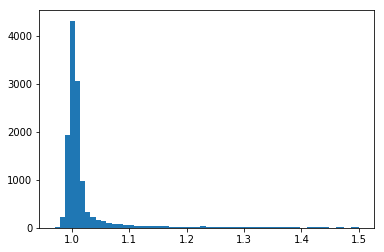

In [10]:
plt.hist(red_chi_2_2,bins=np.logspace(np.log10(0.97),np.log10(1.5),50))

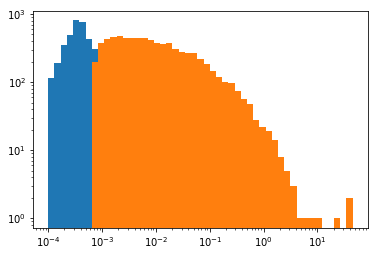

In [11]:
plt.hist(red_chi_subt[red_chi_2_2<1.04],bins=np.logspace(np.log10(0.0001),np.log10(45),50)) #[red_chi_2_2<1.04]
plt.hist(red_chi_subt[(red_chi_subt>0.0007) & (red_chi_2_2<1.04)],bins=np.logspace(np.log10(0.0001),np.log10(45),50))#[red_chi_subt>0.001]
plt.xscale('log')
plt.yscale('log')

In [12]:
len(red_chi_subt[(red_chi_subt>0.0007) & (red_chi_2_2<1.04)])

7525

In [13]:
df_passed = df[(red_chi_subt>0.0007) & (red_chi_2_2<1.04)]

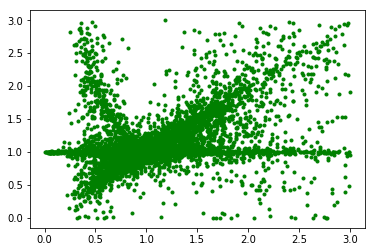

In [14]:
#plt.loglog(df['s_true'][df['s_fitted']<3],df['s_fitted'][df['s_fitted']<3],'b.',df['s_true'],df['s_true'],'g-')
plt.plot(df_passed['s_true'][(df_passed['s_fitted']<3) & (df_passed['s_true']<3)],
         df_passed['s_fitted'][(df_passed['s_fitted']<3) & (df_passed['s_true']<3)],'g.')


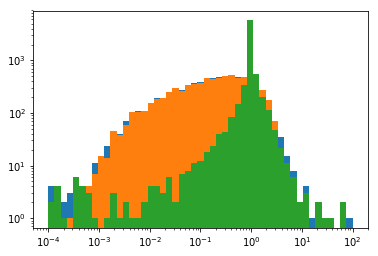

In [15]:
plt.hist(df_passed['u0_fitted'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))
plt.hist(df_passed['u0_true'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))
plt.hist(df_passed['u0_fitted']/df_passed['u0_true'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))


plt.xscale('log')
plt.yscale('log')

In [16]:
red_chi_2_1 = np.abs(2*df_passed['chi_2_1'])/38316
red_chi_2_2 = np.abs(2*df_passed['chi_2_2'])/38316
red_chi_subt = red_chi_2_1 - red_chi_2_2

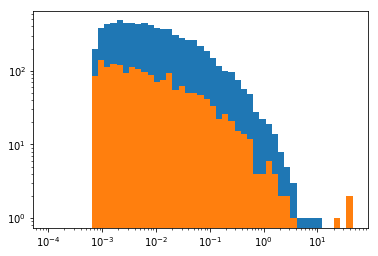

In [17]:
plt.hist(red_chi_subt,bins=np.logspace(np.log10(0.0001),np.log10(45),50)) #[red_chi_2_2<1.04]
plt.hist(red_chi_subt[df_passed['u0_fitted']<0.045],bins=np.logspace(np.log10(0.0001),np.log10(45),50))#[red_chi_subt>0.001]
plt.xscale('log')
plt.yscale('log')

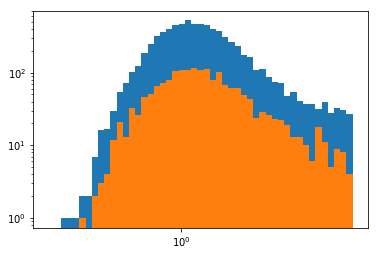

In [18]:
plt.hist(red_chi_2_2,bins=np.logspace(np.log10(0.97),np.log10(1.04),50)) #[red_chi_2_2<1.04]
plt.hist(red_chi_2_2[df_passed['u0_fitted']<0.045],bins=np.logspace(np.log10(0.97),np.log10(1.04),50))#[red_chi_subt>0.001]
plt.xscale('log')
plt.yscale('log')

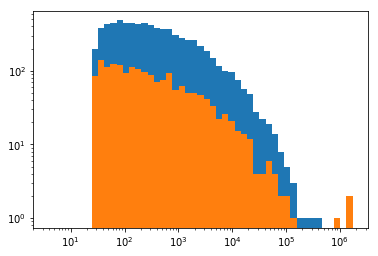

In [19]:
plt.hist(red_chi_subt*38316,bins=np.logspace(np.log10(0.0001*38316),np.log10(45*38316),50)) #[red_chi_2_2<1.04]
plt.hist(red_chi_subt[df_passed['u0_fitted']<0.045]*38316,bins=np.logspace(np.log10(0.0001*38316),np.log10(45*38316),50))#[red_chi_subt>0.001]
plt.xscale('log')
plt.yscale('log')

In [20]:
df_passed_v2 = df_passed[((red_chi_subt*38316)>160)]

In [21]:
len(df_passed_v2)

4673

In [22]:
red_chi_2_1 = np.abs(2*df_passed_v2['chi_2_1'])/38316
red_chi_2_2 = np.abs(2*df_passed_v2['chi_2_2'])/38316
red_chi_subt = red_chi_2_1 - red_chi_2_2

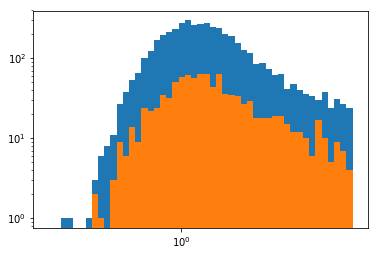

In [23]:
plt.hist(red_chi_2_2,bins=np.logspace(np.log10(0.97),np.log10(1.04),50)) #[red_chi_2_2<1.04]
plt.hist(red_chi_2_2[df_passed_v2['u0_fitted']<0.045],bins=np.logspace(np.log10(0.97),np.log10(1.04),50))#[red_chi_subt>0.001]
plt.xscale('log')
plt.yscale('log')

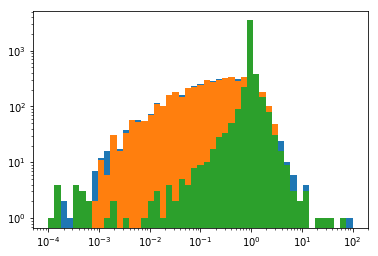

In [24]:
plt.hist(df_passed_v2['u0_fitted'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))
plt.hist(df_passed_v2['u0_true'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))
plt.hist(df_passed_v2['u0_fitted']/df_passed_v2
         ['u0_true'],bins=np.logspace(np.log10(0.0001),np.log10(100),50))


plt.xscale('log')
plt.yscale('log')

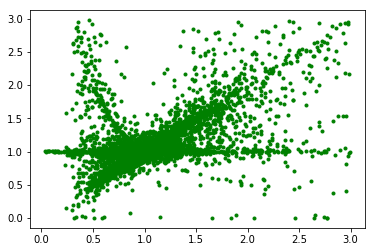

In [25]:
#plt.loglog(df['s_true'][df['s_fitted']<3],df['s_fitted'][df['s_fitted']<3],'b.',df['s_true'],df['s_true'],'g-')
plt.plot(df_passed_v2['s_true'][(df_passed_v2['s_fitted']<3) & (df_passed_v2['s_true']<3)],
         df_passed_v2['s_fitted'][(df_passed_v2['s_fitted']<3) & (df_passed_v2['s_true']<3)],'g.')



In [26]:
len(df_passed_v2[df_passed_v2['u0_fitted']<0.045])

1002

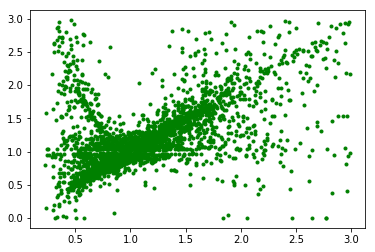

In [27]:
#plt.loglog(df['s_true'][df['s_fitted']<3],df['s_fitted'][df['s_fitted']<3],'b.',df['s_true'],df['s_true'],'g-')
df_passed_v3 = df_passed_v2[df_passed_v2['u0_fitted']>0.045]
plt.plot(df_passed_v3['s_true'][(df_passed_v3['s_fitted']<3) & (df_passed_v3['s_true']<3)],
         df_passed_v3['s_fitted'][(df_passed_v3['s_fitted']<3) & (df_passed_v3['s_true']<3)],'g.')




In [8]:
len(df)

13010

In [6]:
def d_w (q):
    return ((1+(q**(1/3.)))**(3/2.))/((1+q)**(1/2.))

def d_c (x):
    g_ = x/((1+x)**2)
    res = []
    q = Symbol('q',positive='True')
    for g in g_:
        c = np.asarray(solve(27.*g*(q**8)+q**3-3.*(q**2)+3.*q-1 , q))
        res.append(c.item(0))
    return np.asarray(res)

In [7]:
q = np.logspace(np.log10(10**-5),np.log10(1.),20)
d_w_ = d_w(q)
d_c_ = d_c(q)
print 'done'

done


Caustic topologies for binary-lens events:

- Wide topology: For $d < d_w$, Has two caustics
- Intermediate/Resonant topology : For $d_w < d < d_c $ , Has a single caustic
- Close topology: For $d < d_c$, Has two caustics

$\frac{q}{{(1+q)}^2} = \frac {{(1-d_c)}^3}{27 {d_c}^8}$ , $ d_w = \frac{{(1+q^{1/3})}^{3/2}}{{(1+q)}^{1/2}}$

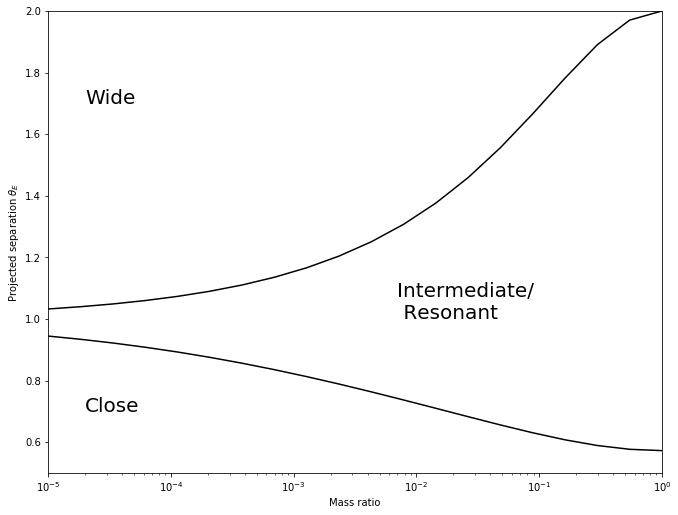

In [8]:
plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_w_,'k-')
plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_c_,'k-')
plt.xlabel('Mass ratio')
plt.ylabel('Projected separation '+ r'$ {\theta}_E $')
plt.xscale('log')
plt.ylim(0.5,2)
plt.xlim(10**-5,1)
plt.text(2*10**-5,1.7,'Wide',size=20)
plt.text(7*10**-3,1,'Intermediate/ \n Resonant',size=20)
plt.text(2*10**-5,0.7,'Close',size=20)

fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/2.png')


In [54]:
df['q_fitted_modified'] = (df['q_fitted']**2 - df['rho']**2)

In [55]:
len(df)

13010

In [56]:
x = np.logspace(np.log10(10**-5),np.log10(1.),20)
f1 = interpolate.interp1d(x, d_w_,fill_value="extrapolate")
f2 = interpolate.interp1d(x, d_c_,fill_value="extrapolate")

In [57]:
f(df['q_true'])

array([1.28704757, 1.0267761 , 1.09974582, ..., 1.04698697, 1.05176333,
       1.65630474])

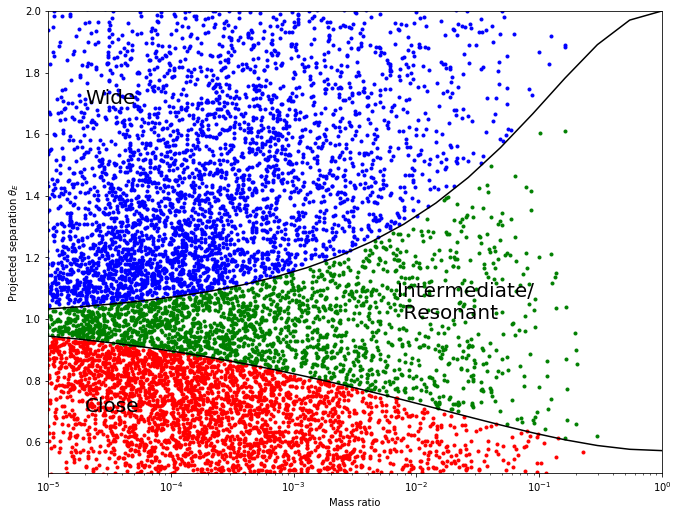

In [58]:
#plt.plot(df['q_true'],f(df['q_true']),'r.')

plt.plot(df['q_true'][df['s_true']>f1(df['q_true'])],df['s_true'][df['s_true']>f1(df['q_true'])],'b.')
plt.plot(df['q_true'][df['s_true']<f2(df['q_true'])],df['s_true'][df['s_true']<f2(df['q_true'])],'r.')
plt.plot(df['q_true'][(df['s_true']>f2(df['q_true'])) & (df['s_true']<f1(df['q_true']))],df['s_true'][(df['s_true']>f2(df['q_true'])) & (df['s_true']<f1(df['q_true']))],'g.')



# plt.plot(df['q_fitted'][((df['s_fitted']/df['s_true'])<1.5) & ((df['s_fitted']/df['s_true'])>0.85)],
#          df['s_fitted'][((df['s_fitted']/df['s_true'])<1.5) & ((df['s_fitted']/df['s_true'])>0.85)],'g.')
# plt.plot(df['q_fitted'][((df['s_fitted']/df['s_true'])>1.5) | ((df['s_fitted']/df['s_true'])<0.85)],
#          df['s_fitted'][((df['s_fitted']/df['s_true'])>1.5) | ((df['s_fitted']/df['s_true'])<0.85)],'r.',alpha=0.3)

plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_w_,'k-')
plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_c_,'k-')


plt.xlabel('Mass ratio')
plt.ylabel('Projected separation '+ r'$ {\theta}_E $')
plt.xscale('log')
plt.ylim(0.5,2)
plt.xlim(10**-5,1)

plt.text(2*10**-5,1.7,'Wide',size=20)
plt.text(7*10**-3,1,'Intermediate/ \n Resonant',size=20)
plt.text(2*10**-5,0.7,'Close',size=20)

fig = plt.gcf()
fig.set_size_inches(11,8.5)
fig.savefig(home+'/Desktop/3.png')


In [66]:
df_wide = df[df['s_true']>f1(df['q_true'])]
df_close = df[df['s_true']<f2(df['q_true'])]
df_res = df[(df['s_true']>f2(df['q_true'])) & (df['s_true']<f1(df['q_true']))]

In [67]:
df_w_c = pd.concat([df_wide,df_close])

In [68]:
len(df_w_c)

10897

In [69]:
df_w_c.to_csv('df_wide_close_topo.csv')

(0.5, 1.75)

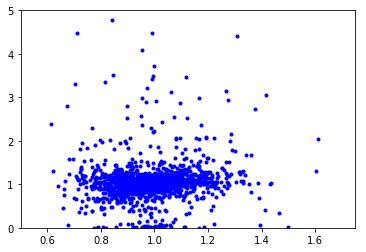

In [74]:
plt.plot(df_res['s_true'],df_res['s_fitted'],'b.')
plt.ylim(0,5)
plt.xlim(0.5,1.75)

In [38]:
(len(df['q_true'][df['s_true']>f1(df['q_true'])])+len(df['q_true'][df['s_true']<f2(df['q_true'])]))/float(len(df))

0.8376698134929772

In [39]:
(len(df)-(len(df['q_true'][df['s_true']>f1(df['q_true'])])+len(df['q_true'][df['s_true']<f2(df['q_true'])])))/float(len(df))

0.1623301865070228

(1e-05, 1)

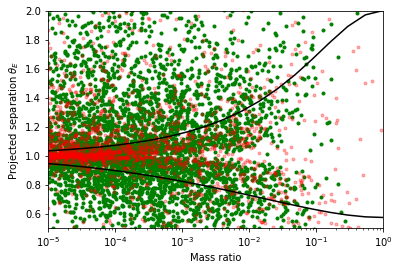

In [43]:
#plt.plot(df['q_true'],df['s_true'],'b.')
plt.plot(df['q_fitted'][((df['q_fitted']/df['q_true'])<10) & ((df['q_fitted']/df['q_true'])>0.1)],
        df['s_fitted'][((df['q_fitted']/df['q_true'])<10) & ((df['q_fitted']/df['q_true'])>0.1)],'g.')
plt.plot(df['q_fitted'][((df['q_fitted']/df['q_true'])>10) | ((df['q_fitted']/df['q_true'])<0.1)],
         df['s_fitted'][((df['q_fitted']/df['q_true'])>10) | ((df['q_fitted']/df['q_true'])<0.1)],'r.',alpha=0.3)

plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_w_,'k-')
plt.plot(np.logspace(np.log10(10**-5),np.log10(1.),20),d_c_,'k-')


plt.xlabel('Mass ratio')
plt.ylabel('Projected separation '+ r'$ {\theta}_E $')
plt.xscale('log')
plt.ylim(0.5,2)
plt.xlim(10**-5,1)






In [33]:
def d_c_single (x):
    g = x/((1+x)**2)
    res = []
    q = Symbol('q',positive='True')
    c = np.asarray(solve(27.*g*(q**8)+q**3-3.*(q**2)+3.*q-1 , q))
    return c.item(0)

In [34]:
df_topo_green = df[(df['s_fitted']>d_w(df['q_fitted'])) ] #| (df['s_fitted']<d_c(df['q_fitted']))
print 'done'

done


In [35]:
len(df_topo_green)

5802

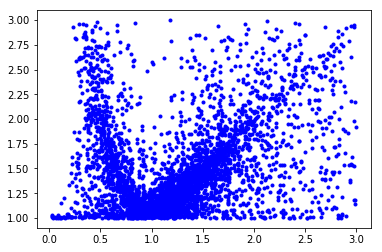

In [36]:
plt.plot(df_topo_green['s_true'][(df_topo_green['s_true']<3)&(df_topo_green['s_fitted']<3)],
         df_topo_green['s_fitted'][(df_topo_green['s_true']<3)&(df_topo_green['s_fitted']<3)],'b.')

In [7]:
len(df)

13029

In [10]:
df_n = df[((red_chi_2_1-red_chi_2_2)>0.001) & (red_chi_2_2>1.25)]
df_n = df_n[df_n['u0_fitted']>0.045]

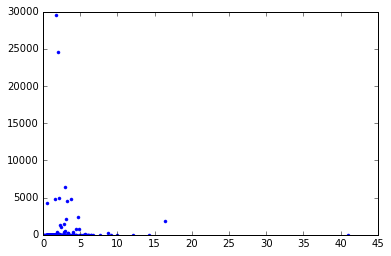

In [11]:
plt.plot(df_n['s_true'],df_n['s_fitted'],'b.')

In [12]:
max(df_n['s_true'])

40.9272

In [15]:
df_n[['name','s_fitted','s_true','tE_fitted','tE_true']][df_n['s_fitted']>41]

,name,s_fitted,s_true,tE_fitted,tE_true
3209,cassan_30_21_2931.det.lc.gz,2122.128164,3.022890,-0.006066,5.18602
5381,cassan_44_18_1995.det.lc.gz,2434.627785,4.730960,-0.007888,4.44567
39,cassan_0_32_1164.det.lc.gz,1909.882395,16.439200,-0.012232,1.49124
434,cassan_12_83_1364.det.lc.gz,758.349712,4.863540,0.071060,11.97380
948,cassan_17_22_2047.det.lc.gz,300.664455,3.376460,0.061596,24.17980
1146,cassan_18_9_714.det.lc.gz,319.055100,3.970630,-0.106164,9.10243
1495,cassan_21_137_2593.det.lc.gz,1364.625659,2.278750,-2.456597,4.73771
1893,cassan_24_43_2155.det.lc.gz,144.281445,3.978000,-0.189962,7.67846
2186,cassan_27_137_3137.det.lc.gz,283.801261,8.748940,0.129584,4.29796
2292,cassan_28_126_1676.det.lc.gz,4876.308899,3.812600,0.027298,24.13250
